In [1]:
from __future__ import annotations

import random
import string

import spacy
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display

%config InlineBackend.figure_format = 'svg' 

In [2]:
RAW_DATA_FILENAME = 'reddit_ell_eng_raw{}.csv'
RAW_DATA_MAXLEN = ['none', '300', '200']

nlp = spacy.load('en_core_web_lg', disable=['ner', 'parser'])

In [3]:
def pos_tag_counts(df: pd.DataFrame, pos_col: str = 'pos_tags') -> pd.Series[int]:
    """Count the number of times each POS tag appears in the data."""
    pos_tags = df[pos_col].str.split(expand=True).stack()
    return pos_tags.value_counts()


def is_content_word(token: spacy.tokens.Token) -> bool:
    """Return True if a token is a content word, False otherwise."""
    return not token.is_stop and not token.is_punct


def get_pos_content_words(doc: str) -> str:
    """Return the POS tags of the content words in a document. 
    Function words are left as is."""
    return " ".join([token.pos_ if is_content_word(token) 
                     else token.text for token in nlp(doc)])


def get_pos_tags(doc: str) -> str:
    """Return a series of POS tags for each document in the dataframe."""
    return " ".join([token.pos_ for token in nlp(doc)])


def replace_digits(text: str) -> str:
    return "".join('0' if char.isdigit() else char for char in text)

In [4]:
pos_counts = {}

for maxlen in RAW_DATA_MAXLEN:
    df = pd.read_csv(RAW_DATA_FILENAME.format(f"_{maxlen}" if maxlen != 'none' else ''), encoding='utf-8')
    df = df.assign(text=df['text'].apply(replace_digits),
                   pos_tags=df['text'].apply(get_pos_tags),
                   pos_fw=df['text'].apply(get_pos_content_words))
    print(f"{maxlen=}")
    pos_counts[maxlen] = pos_tag_counts(df, 'pos_tags')
    df.to_csv(f"reddit_ell_eng_raw_pos_{maxlen}.csv", index=False)

maxlen='none'
maxlen='300'
maxlen='200'


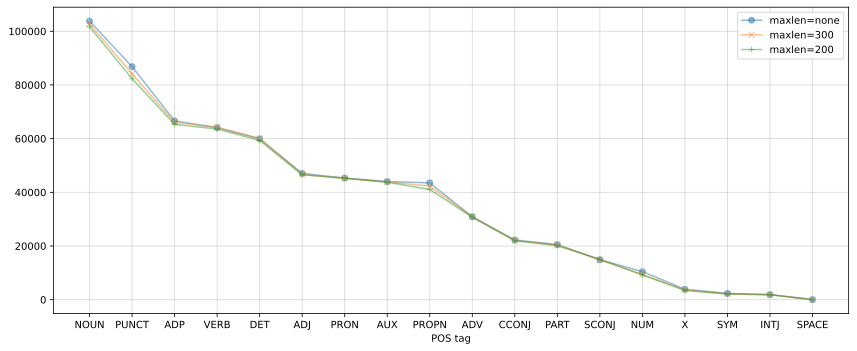

In [10]:
markers = ['o', 'x', '+']
fig, ax = plt.subplots(figsize=(12, 5))
for i, maxlen in enumerate(RAW_DATA_MAXLEN):
    ax.plot(pos_counts[maxlen], marker=markers[i], label=f"maxlen={maxlen}", alpha=0.5, zorder=i)
ax.set_xlabel('POS tag')
ax.legend()
plt.grid(alpha=0.5, zorder=0)
plt.tight_layout()
plt.show();